In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Conv1D, LSTM, Flatten

In [2]:
#index_col = 0을 하는 이유 -> 인덱스를 조금이라도 줄여서 차원의 저주를 피하기 위해
df = pd.read_csv("C:/AI/DL/abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [3]:
#칼럼명 확인
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [4]:
#결측치 확인
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [5]:
#결측치 제거
df = df.dropna()
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [6]:

# LabelEncoder 객체 생성
label = LabelEncoder()

# 문자로 지정된 열의 데이터에 대해 LabelEncoder를 적용하여 변환
df['Sex'] = label.fit_transform(df['Sex'])

df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

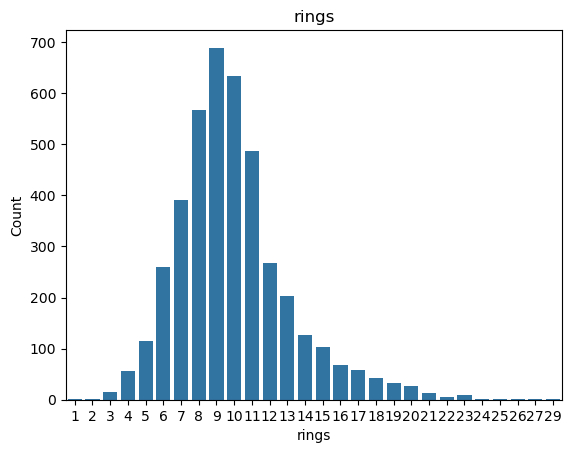

In [7]:
#레이블 갯수 확인
sns.countplot(data = df, x="Rings")
plt.xlabel("rings")
plt.ylabel("Count")
plt.title("rings")

df['Rings'].value_counts()

In [8]:
# 레이블 인코딩 (Rings를 범주화)
df['Rings'] = pd.cut(df['Rings'], bins=[0, 10, 20, 30], labels=[0, 1, 2])  # 3개 범주로 나누기

X = df.drop('Rings', axis=1)
y = df['Rings']

In [9]:
#원-핫 엔코딩
y = pd.get_dummies(y).values
y

array([[False,  True, False],
       [ True, False, False],
       [ True, False, False],
       ...,
       [ True, False, False],
       [ True, False, False],
       [False,  True, False]])

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((3132, 8), (3132, 3), (1045, 8), (1045, 3))

In [11]:
# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models

# 입력 데이터 형태 변환
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [15]:
from tensorflow.keras import layers, models

# CNN 모델 정의
model = models.Sequential()
model.add(layers.Conv1D(32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))  # 1x2 커널
model.add(layers.MaxPooling1D(2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))  # 클래스 수에 맞게 출력층 설정

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # 다중 클래스 분류에 적합한 손실 함수


In [16]:
model_history=model.fit(x=X_train, y=y_train, epochs=50, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6773 - loss: 0.7685 - val_accuracy: 0.7206 - val_loss: 0.5726
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7122 - loss: 0.5835 - val_accuracy: 0.7378 - val_loss: 0.5548
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7290 - loss: 0.5656 - val_accuracy: 0.7455 - val_loss: 0.5433
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7468 - loss: 0.5561 - val_accuracy: 0.7110 - val_loss: 0.5463
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7516 - loss: 0.5387 - val_accuracy: 0.7665 - val_loss: 0.5244
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7522 - loss: 0.5350 - val_accuracy: 0.7646 - val_loss: 0.5172
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7476 - loss: 0.5401 - val_accuracy: 0.7589 - val_loss: 0.5137
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7501 - loss: 0.5227 - val_accuracy: 0.7598 - val_loss:

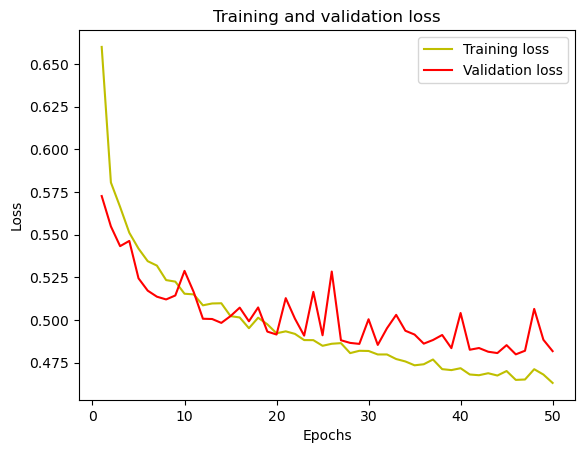

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

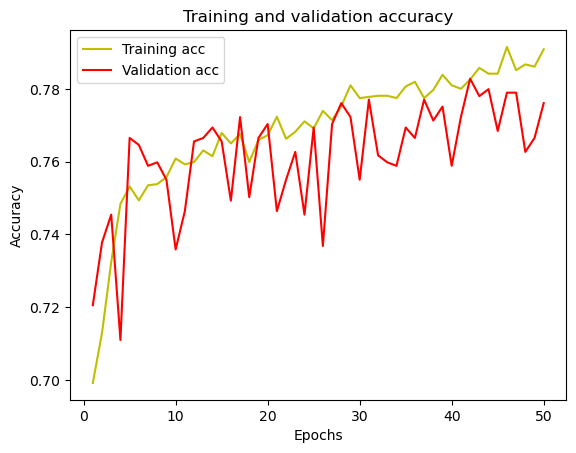

In [18]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()